In [1]:
#Question 1: Extracting Tesla Stock Data Using yfinance)

import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock data using history and save to tesla_data
tesla_data = tesla.history(period="max")

# Reset the index to make the Date a column instead of the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
!pip install yfinance pandas --quiet


In [6]:
import yfinance as yf
import pandas as pd

# Create a yfinance Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract the historical stock data for Tesla, using max available period
tesla_data = tesla.history(period="max")

# Reset index to make 'Date' a column instead of index
tesla_data.reset_index(inplace=True)

# Display the first five rows to verify
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [10]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping 

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
print(f"Found {len(tables)} tables on the page.")

tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

if tesla_revenue_table:
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    for row in tesla_revenue_table.tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

    # Clean the revenue data
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
    tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

    print(tesla_revenue.head())
else:
    print("Tesla revenue table not found.")

Found 6 tables on the page.
        Date  Revenue
0 2025-03-31    19335
1 2024-12-31    25707
2 2024-09-30    25182
3 2024-06-30    25500
4 2024-03-31    21301


In [11]:
# Question 3 – Extracting GameStop Stock Data Using yfinance – 2 Points

import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get historical market data for the maximum period
gme_data = gme.history(period="max")

# Reset index so 'Date' becomes a column
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [18]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping 

import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# URL for GameStop revenue data
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch and parse the page
response = requests.get(gme_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
html_string = str(soup)

# Read tables
tables = pd.read_html(StringIO(html_string))
print(f"✅ Found {len(tables)} tables on the page.")

# Extract Table 1: Quarterly Revenue
gme_revenue_raw = tables[1]
gme_revenue_raw.columns = ["Date", "Revenue"]

# Clean the data
gme_revenue_raw["Revenue"] = gme_revenue_raw["Revenue"].replace('[\$,]', '', regex=True)
gme_revenue_raw = gme_revenue_raw[gme_revenue_raw["Revenue"] != ""]
gme_revenue_raw["Revenue"] = pd.to_numeric(gme_revenue_raw["Revenue"])
gme_revenue_raw["Date"] = pd.to_datetime(gme_revenue_raw["Date"])

# Final GameStop revenue dataframe
gme_revenue = gme_revenue_raw
print("✅ Cleaned GameStop Revenue Data:")
display(gme_revenue.head())

✅ Found 6 tables on the page.
✅ Cleaned GameStop Revenue Data:


,Date,Revenue
0,2025-04-30,732
1,2025-01-31,1283
2,2024-10-31,860
3,2024-07-31,798
4,2024-04-30,882


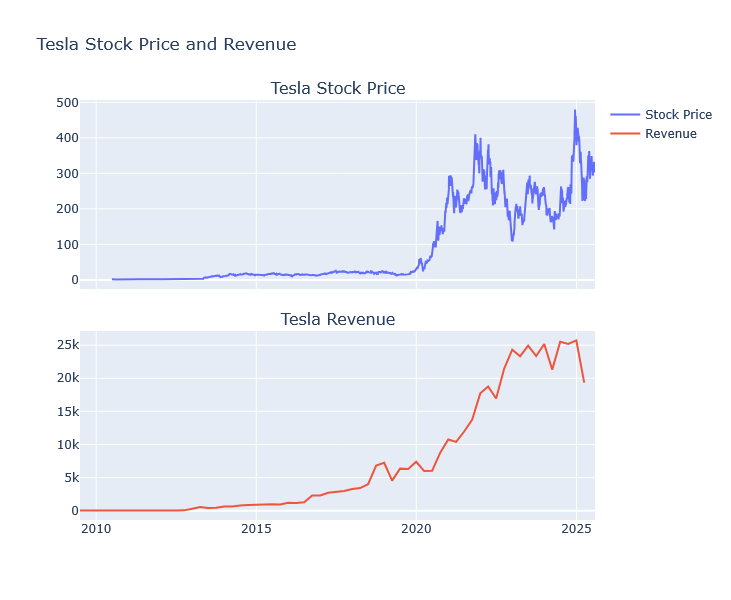

In [22]:
#Question 5 - Tesla Stock and Revenue Dashboard

# Remove timezone from tesla_data['Date']
tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)

# Ensure tesla_revenue['Date'] is datetime (should already be, but confirm)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Now filter tesla_revenue by tesla_data date max without error
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= tesla_data['Date'].max()]


import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Fix timezone issue
tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter revenue data
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= tesla_data['Date'].max()]

# Plot function
def plot_stock_and_revenue(stock_df, revenue_df, stock_name):
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.1,
        subplot_titles=(f"{stock_name} Stock Price", f"{stock_name} Revenue")
    )

    fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['Close'], name="Stock Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_df['Date'], y=revenue_df['Revenue'], name="Revenue"), row=2, col=1)

    fig.update_layout(height=600, width=800, title_text=f"{stock_name} Stock Price and Revenue")
    fig.show()

# Plot Tesla data
plot_stock_and_revenue(tesla_data, tesla_revenue_filtered, "Tesla")

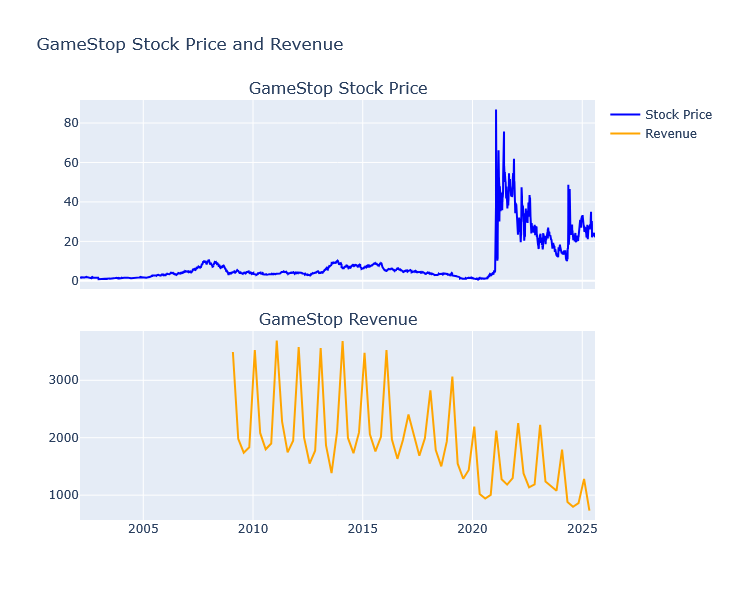

In [25]:
#Question 6 - GameStop Stock and Revenue Dashboard

# Remove timezone from both Date columns
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']).dt.tz_localize(None)
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)

# Filter revenue data
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= gme_data['Date'].max()]

# Plot
plot_stock_and_revenue(gme_data, gme_revenue_filtered, "GameStop")